Imnportar las librerías necesarias para el ejercicio

In [1]:
import tensorflow as tf
import numpy as np

Declaramos unos cuantos datos aleatorios para entrenar el modelo

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

En la parte comentada se hace una red neuronal con solamente una neurona y una conexión (peor predicción), en la otra parte se declara una red neuronal con 2 capas de 3 neuronas y una salida

In [3]:
# capa = tf.keras.layers.Dense(units=1, input_shape=[1])
# modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

c:\Users\mateo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Se compila el modelo y se le especifica el optimizador Adam con una tasa de aprendizaje de 0.1 (Cuanto mayor este valor la red va a ser más "brusca" y cuanto menor va a ser mas fina)

In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

Se entrena el modelo con 1000 vueltas y se declara verbose a False para que no haya salidas por consola

In [5]:
print("Comenzando entrenamiento del modelo...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado")

Comenzando entrenamiento del modelo...
Modelo entrenado


Gracias a matplotlib podemos ver el número de vueltas (# Epoca) y la magnitud de perdida, vemos que deja de aprender casi a las 100 vueltas, con una sola neurona dejaba de aprender por el 500

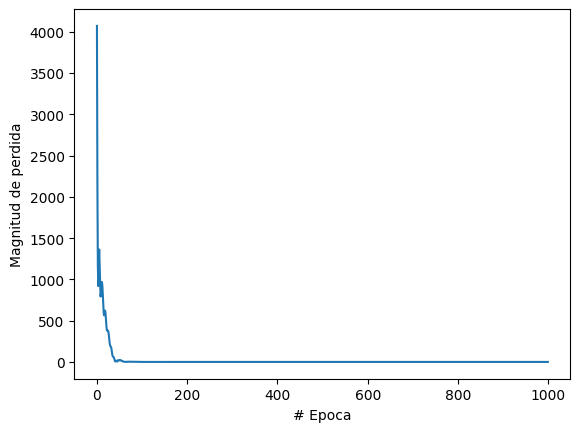

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

Imprimimos el valor, en este caso el valor correcto debería de ser 212, pero como los datos de entrenamiento son escasos se queda muy cerca

In [7]:
print("Hagamos una prediccion!")
resultado = modelo.predict([100])
# Si no es en un cuaderno, el 100 del predict da error
print("El resultado es " + str(resultado) + " fahrenheit")

Hagamos una prediccion!


ValueError: Unrecognized data type: x=[100] (of type <class 'list'>)

Por último podemos ver el peso (conexion entre neuronas) y el sesgo (valor de salida) de cada una de las neuronas, como vemos no tiene mucho sentido pero es el camino más optmizado que ha encontrado la red para llegar a este resultado

In [ ]:
print("Variables internas del modelo")
# print(capa.get_weights())

print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.24005316,  0.40783724, -0.23822469]], dtype=float32), array([ 2.823757,  3.868546, -3.0404  ], dtype=float32)]
[array([[ 0.41416   , -0.59318954, -1.299732  ],
       [ 0.5849693 , -1.8263267 ,  0.2830007 ],
       [-0.4429101 ,  0.8905972 ,  1.3146302 ]], dtype=float32), array([ 1.0556442, -3.493162 , -3.9608128], dtype=float32)]
[array([[-0.02048456],
       [-1.1164322 ],
       [-1.1370457 ]], dtype=float32), array([3.4145653], dtype=float32)]
